<a href="https://colab.research.google.com/github/manuel1729/Simulaci-n-1/blob/main/Simulaci%C3%B3n_juego_con_monedas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio
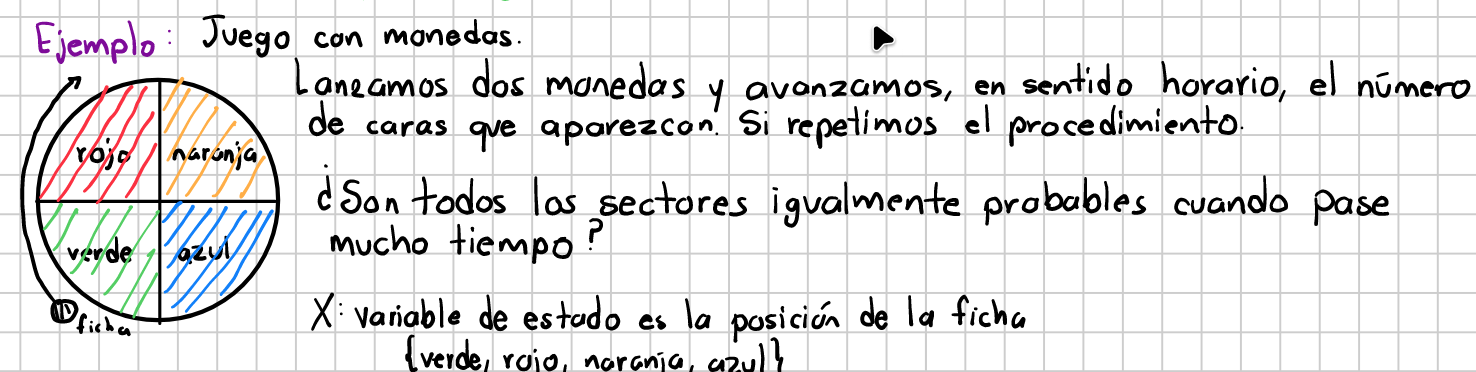

Los posibles estados en las monedas
$S=\{CC,CX,XC,XX\}$

$P(CC)=\frac{1}{4}$

$P(CX)=\frac{1}{2}=P(XC)$

$P(XX)=\frac{1}{4}$

# **a) Sol analítica breve**

$x_n$ a la probabilidad de estar en sector naranja tras n lanzamientos.

$y_n$ a la probabilidad de estar en sector azul tras n lanzamientos.

$z_n$ a la probabilidad de estar en sector verde tras n lanzamientos.

$t_n$ a la probabilidad de estar en sector rojo tras n lanzamientos.

Usamos Teorema de la probabilidad total:

$P(A)=\sum_1^n P(A|B_i)*P(B_i)$

Ahora para n=1 se tiene que

$x_1=P(NARANJA)=$

$P(NARANJA|NARANJA)*P(NARANJA)$

$+P(NARANJA|AZUL)*P(AZUL)$

$+P(NARANJA|VERDE)*P(VERDE)$

$+P(NARANJA|ROJO)*P(ROJO)$

Siendo $P(NARANJA)=x_0$

$P(AZUL)=y_0$

$P(VERDE)=z_0$

$P(ROJO)=t_0$

$x_1=\frac{1}{4}x_0+0*y_0+\frac{1}{4}z_0+\frac{1}{4}t_0$

$y_1=\frac{2}{4}x_0+\frac{1}{4}y_0+0*z_0+\frac{1}{4}t_0$

$z_1=\frac{1}{4}x_0+\frac{2}{4}y_0+\frac{1}{4}z_0+0*t_0$

$z_1=0*x_0+\frac{1}{4}y_0+\frac{2}{4}z_0+\frac{1}{4}t_0$

Así en general, se tiene:

$$\begin{bmatrix} x_n \\
y_n\\
z_n\\
t_n \end{bmatrix} = \begin{bmatrix} \frac{1}{4} & 0 & \frac{1}{4} & \frac{2}{4} \\
\frac{2}{4} & \frac{1}{4} & 0 & \frac{1}{4}\\
\frac{1}{4} & \frac{2}{4} & \frac{1}{4} & 0\\
0 & \frac{1}{4} & \frac{2}{4} & \frac{1}{4} \end{bmatrix} \begin{bmatrix} x_{n-1} \\
y_{n-1}\\
z_{n-1}\\
t_{n-1} \end{bmatrix}$$

Simplificando $X_n=A*X_{n-1}=A^2X_{n-2}=...=A^n*X_0$

Para resolver, hay que calcular A^n

Calculando A^n todas las entradas de nuestra matriz se aproximarán a 0.25.

$\therefore$ Todos los sectores son igualmente posibles

In [40]:
#Multiplicar matriz a la n
def multiplicar_matriz(A, n):
    if n == 1:
        return A
    else:
        return np.dot(A, multiplicar_matriz(A, n-1))

A=[[1/4,0,1/4,2/4],[2/4,1/4,0,1/4],[1/4,2/4,1/4,0],[0,1/4,2/4,1/4]]
M=multiplicar_matriz(A,27)
print(M)

[[0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]]


# **b) Sol por simulación**

In [30]:
#Importamos librería
import numpy as np
import matplotlib.pyplot as plt

In [25]:
#Simulamos el tiro de dos monedas
def tiro():
  return np.random.binomial(2, 0.5)

In [27]:
#Definimos la posición del tablero en este caso con longitud=4
def tablero(posicion,longitud):
  return posicion % longitud

In [48]:
def experimento(n):
    #Creamos diccionario para asignar los números a los colores
    sectores = {0: "rojo", 1: "naranja", 2: "azul", 3: "verde"}
    #Aquí recorre el color evaluando elos sectores
    conteo = {color: 0 for color in sectores.values()}
    #Generamos un numero de (0,3) que representa las casillas
    posicion = np.random.randint(0, 3)

    for _ in range(n):
        pasos = tiro() #moneda
        posicion = tablero(posicion + pasos, 4) #posición tablero
        conteo[sectores[posicion]] += 1

        #Imprimimos la probabilidad
    print("Probabilidades de cada sector:")
    for color in conteo:
        print(f"{color}: {conteo[color]/n}")

    return conteo

In [51]:
l=experimento(10000)

Probabilidades de cada sector:
rojo: 0.2539
naranja: 0.2502
azul: 0.2515
verde: 0.2444
